### This notebook performs an Exploratory Data Analysis on the data from the papers

In [57]:
# Import packages
import pandas as pd
import matplotlib as plt
import nltk
import string

### First we load the data from the csv file and show the first 5 rows:

In [59]:
df = pd.read_csv('/data/s1847503/SDDM/data.csv', index_col=0)
df.head()

,paper_id,title,list_authors,abstract,full_text
0,d23c6a066a58dbe5ec5fa57e67f1b795337299f7,LY6E impairs coronavirus fusion and confers im...,"['Stephanie Pfaender', 'Katrina B Mar 4#', 'El...",Zoonotic coronaviruses (CoVs) are significant ...,4 hepatoma cells was largely specific to CoV. ...
1,618cd102ec5051a05ca5131e21961c964152f15c,Mating strategy is determinant of Adenovirus p...,"['Federica Rossetto', 'Maria Iglesias-Caballer...",Adenoviruses are double-strained DNA viruses f...,"across species, we found that the number of Ad..."
2,ac81102667b0d56edeb8ab0044765dc49a19f374,Determination of host cell proteins constituti...,"['V&apos;kovski Philip', 'Gerber Markus', 'Kel...",Positive-sense RNA viruses hijack intracellula...,8 peptide of only 14 amino acids at the carbox...
3,35ac99bfeb665ce0a2ae361dba1161e69eb8b7d5,ΦX174 Attenuation by Whole Genome Codon Deopti...,"['James T Van Leuven', 'Martina M Ederer', 'Ka...",Natural selection acting on synonymous mutatio...,The unequal use of synonymous codons is known ...
4,ad146e228bda4e5a3d56b28a3a1acbd01e0b323e,Modelling the epidemic 2019-nCoV event in Ital...,"['Marco Claudio Traini', 'Carla Caponi', 'Gius...",NaN,Late December 2019 health facilities reported ...


### Now we investigate which words appear most in the papers

In [60]:
# Remove interpunction
def clean_text(text):
    new_text = text
    for i in string.punctuation:
        new_text = new_text.replace(i,"")
    new_text = text.lower()
    return new_text

df['full_text'] = df['full_text'].apply(clean_text)
df['text_length'] = df['full_text'].apply(lambda x: len(x.split()))
df = df.loc[df['text_length'] > 100]
df.head()

,paper_id,title,list_authors,abstract,full_text,text_length
0,d23c6a066a58dbe5ec5fa57e67f1b795337299f7,LY6E impairs coronavirus fusion and confers im...,"['Stephanie Pfaender', 'Katrina B Mar 4#', 'El...",Zoonotic coronaviruses (CoVs) are significant ...,4 hepatoma cells was largely specific to cov. ...,5770
1,618cd102ec5051a05ca5131e21961c964152f15c,Mating strategy is determinant of Adenovirus p...,"['Federica Rossetto', 'Maria Iglesias-Caballer...",Adenoviruses are double-strained DNA viruses f...,"across species, we found that the number of ad...",832
2,ac81102667b0d56edeb8ab0044765dc49a19f374,Determination of host cell proteins constituti...,"['V&apos;kovski Philip', 'Gerber Markus', 'Kel...",Positive-sense RNA viruses hijack intracellula...,8 peptide of only 14 amino acids at the carbox...,1102
3,35ac99bfeb665ce0a2ae361dba1161e69eb8b7d5,ΦX174 Attenuation by Whole Genome Codon Deopti...,"['James T Van Leuven', 'Martina M Ederer', 'Ka...",Natural selection acting on synonymous mutatio...,the unequal use of synonymous codons is known ...,4807
4,ad146e228bda4e5a3d56b28a3a1acbd01e0b323e,Modelling the epidemic 2019-nCoV event in Ital...,"['Marco Claudio Traini', 'Carla Caponi', 'Gius...",NaN,late december 2019 health facilities reported ...,1214


In [61]:
print("The dataset contains %d articles" % len(df))

The dataset contains 29037 articles


In [62]:
df['text_length'].describe().transpose()

count     29037.000000
mean       4813.203258
std        7288.336320
min         101.000000
25%        2460.000000
50%        3726.000000
75%        5494.000000
max      257745.000000
Name: text_length, dtype: float64

[]

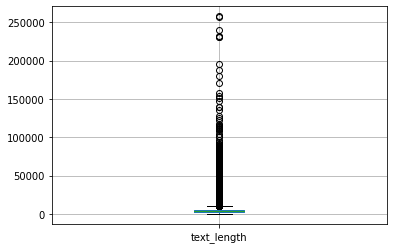

In [63]:
boxplot = df.boxplot(column=['text_length'])
boxplot.plot()

In [65]:
# Print most common words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

counts = pd.Series(' '.join(df['full_text']).split()).value_counts()
counts = counts.loc[counts.index not in stopwords]
counts[:100]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s1847503/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [41]:
# Remove stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
df['full_text'] = df['full_text'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s1847503/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,paper_id,title,list_authors,abstract,full_text,text_length
0,d23c6a066a58dbe5ec5fa57e67f1b795337299f7,LY6E impairs coronavirus fusion and confers im...,"['Stephanie Pfaender', 'Katrina B Mar 4#', 'El...",Zoonotic coronaviruses (CoVs) are significant ...,"[4, hepatoma, cells, largely, specific, cov., ...",5770
1,618cd102ec5051a05ca5131e21961c964152f15c,Mating strategy is determinant of Adenovirus p...,"['Federica Rossetto', 'Maria Iglesias-Caballer...",Adenoviruses are double-strained DNA viruses f...,"[across, species,, found, number, adenoviruses...",832
2,ac81102667b0d56edeb8ab0044765dc49a19f374,Determination of host cell proteins constituti...,"['V&apos;kovski Philip', 'Gerber Markus', 'Kel...",Positive-sense RNA viruses hijack intracellula...,"[8, peptide, 14, amino, acids, carboxyterminus...",1102
3,35ac99bfeb665ce0a2ae361dba1161e69eb8b7d5,ΦX174 Attenuation by Whole Genome Codon Deopti...,"['James T Van Leuven', 'Martina M Ederer', 'Ka...",Natural selection acting on synonymous mutatio...,"[unequal, use, synonymous, codons, known, codo...",4807
4,ad146e228bda4e5a3d56b28a3a1acbd01e0b323e,Modelling the epidemic 2019-nCoV event in Ital...,"['Marco Claudio Traini', 'Carla Caponi', 'Gius...",NaN,"[late, december, 2019, health, facilities, rep...",1214
